A partir del conjunto de datos Automobile Dataset[1] ,realiza la regresión de los precios de automóviles

con las siguientes variantes:

a. Mínimos cuadrados con expansión polinomial de diferentes grados.

b. Mínimos cuadrados con expansión polinomial de grado 20 y penalización por norma l1 y l2
con diferentes valores de λ.

c. Mínimos cuadrados con expansión polinomial de grado 2 y selección de atributos[2].


Grafica el error cuadrático medio en entrenamiento y validación con respecto al grado del polinomio,
valor de λ y número de atributos. Todos los modelos deberán ser evaluados con 10 repeticiones de
validación cruzada de 5 particiones. Selecciona uno de los modelos y reporta su desempeño en el
conjunto de prueba[3].

In [1]:
import pandas as pd

# URL del archivo de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"



column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

# Cargar los datos en un DataFrame
df = pd.read_csv(url, names=column_names)  


In [2]:
df.shape

(205, 26)

In [3]:
import numpy as np

# Reemplazar los valores "?" y None por NaN
df = df.replace(["?", None], np.nan)


In [4]:
# Validamos que los tipos de datos coincidan con los esperados
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
#Es una característica numérica, por lo que la convertimos a tipo numérico
df["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [6]:
# Generamos el diccionario a cambiar
mapeo_cilindros = {
    "four": 4,
    "six": 6,
    "five": 5,
    "three": 3,
    "twelve": 12,
    "two": 2,
    "eight": 8
}

# Reemplazamos los valores de la columna "num-of-cylinders" usando el diccionario
df["num-of-cylinders"] = df["num-of-cylinders"].map(mapeo_cilindros)

In [7]:
# Convertir las columnas a tipo numérico
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors="coerce")
df["bore"] = pd.to_numeric(df["bore"], errors="coerce")
df["stroke"] = pd.to_numeric(df["stroke"], errors="coerce")
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

In [8]:
# Verificamos si hay valores faltantes
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<Axes: ylabel='Frequency'>

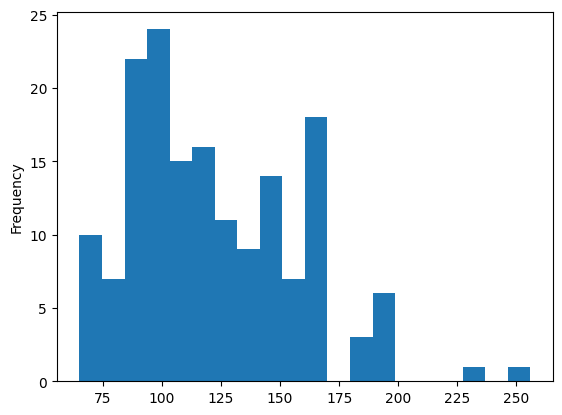

In [9]:
# La columna "normalized-losses" tiene demasiados valores faltantes, veremos su distribución para decidir si remplezar los valores faltantes por la media o la mediana
df['normalized-losses'].plot.hist(bins=20)

La distribución se encuentra sesgada a la derecha y tiene valores atipicos cerca de los 160, veremos si mantiene correlación con alguna otra variable y estudiaremos si vale la pena reemplazarla con algún pronostico

In [10]:
#Seleccionamos todas las columnas numericas
numericas = df.select_dtypes(include=["number"])

#Obtenemos la correlación entre las columnas numéricas
correlaciones = numericas.corr()["normalized-losses"].sort_values(ascending=False)
print(correlaciones)


normalized-losses    1.000000
symboling            0.528667
horsepower           0.295772
peak-rpm             0.264597
price                0.203254
num-of-cylinders     0.175380
engine-size          0.167365
curb-weight          0.119893
width                0.105073
stroke               0.065627
length               0.023220
bore                -0.036167
wheel-base          -0.074362
compression-ratio   -0.132654
highway-mpg         -0.210768
city-mpg            -0.258502
height              -0.432335
Name: normalized-losses, dtype: float64


In [11]:
from sklearn.linear_model import LinearRegression

#Dadas las correlaciones, seleccionamos las columnas que usaremos para el modelo
columnas_modelo = ["symboling", "horsepower", "peak-rpm", "height","city-mpg","normalized-losses"]
#Buscamo solo aquellos que no tengan valores nulos en la columna "normalized-losses"
df_nl = df[df["normalized-losses"].notna()]
#Nos quedamos con las columnas que nos interesan
df_nl = df_nl[columnas_modelo]

X= df_nl.drop("normalized-losses", axis=1)
y = df_nl["normalized-losses"]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento, prueba y validación
# 80% entrenamiento, 10% validación, 10% prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_test = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"MSE en el conjunto de prueba: {mse_test:.2f}")

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_test)
print(f"R² en test: {r2:.3f}")


MSE en el conjunto de prueba: 766.25
R² en test: 0.100


In [13]:
#La idea original era usar la media para rellenar los valores faltantes, pero al observar su distribución sesgada la selección correcta sería la mediana
df['normalized-losses'].mean()

122.0

In [14]:


ds_mean = df['normalized-losses'].mean()

#Creamos un vector de "pronosticos" para hacer la comparación
y_pred_constante = np.full_like(y_test, ds_mean, dtype=np.float64)



mse_constante = mean_squared_error(y_test, y_pred_constante)
print(f"MSE usando 122 como valor constante: {mse_constante:.2f}")
r2 = r2_score(y_test, y_pred_constante)
print(f"R² en test: {r2:.3f}")


MSE usando 122 como valor constante: 851.35
R² en test: -0.000


In [15]:
#Dado que vemos un mejor desempeño en el modelo de regresión lineal, lo usaremos para hacer la predicción de los valores faltantes
#Ahora solo falta predecir los valores faltantes de la columna "normalized-losses" en el conjunto de validación

# Hacer predicciones en el conjunto de validación
y_pred_val = modelo.predict(X_val)

# Calcular el error cuadrático medio (MSE) en el conjunto de validación
mse_test = mean_squared_error(y_val, y_pred_val)
print(f"MSE en el conjunto de validación: {mse_test:.2f}")


r2 = r2_score(y_val, y_pred_val)
print(f"R² en test: {r2:.3f}")

MSE en el conjunto de validación: 1050.07
R² en test: 0.411


In [16]:
# Vector constante para la comparación
y_pred_val = np.full_like(y_val, ds_mean, dtype=np.float64)

# Calcular el error cuadrático medio (MSE) en el conjunto de validación
mse_test = mean_squared_error(y_val, y_pred_val)
print(f"MSE en el conjunto de validación: {mse_test:.2f}")


r2 = r2_score(y_val, y_pred_val)
print(f"R² en test: {r2:.3f}")

MSE en el conjunto de validación: 1790.88
R² en test: -0.005


Como conclusión nuestro modelo mostro mejor desempeño en el conjunto de entrenamiento que en el de validación, sin embargo en ambas ocaciones supero a la media en 'MSE' por lo que los valores faltentes serán reemplazados con los resultados del pronostico en nuestro dataset original.

In [17]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [18]:
# Seleccionamos las caracteristicas que usaremos para hacer la predicción
features = ["symboling", "horsepower", "peak-rpm", "height","city-mpg"]

# Identificar filas que tienen NaN en normalized-losses y datos disponibles para predecir
df_ls_na = df["normalized-losses"].isna()
df_ls_ok = df[features].notna().all(axis=1)
df_ls = df_ls_na & df_ls_ok

# Aplicar modelo solo donde sea posible
df.loc[df_ls, "normalized-losses"] = modelo.predict(df.loc[df_ls, features])

In [19]:
# Verificamos si hay valores faltantes
df.isna().sum()

symboling            0
normalized-losses    2
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

Obrvamos que dos valores no pudieron ser actualizados, seguramente por los mismo dos registros que no tienen caballos de fuerza ni peak rpm, asi que para terminar de inputar la información usaremos la media global actualizada 

In [20]:
# Remplazamos los nulos con los valores más plausibles
df["normalized-losses"].fillna(df["normalized-losses"].median(), inplace=True)
df["num-of-doors"].fillna('four', inplace=True)
df["bore"].fillna(df["bore"].median(), inplace=True)
df["stroke"].fillna(df["stroke"].median(), inplace=True)
df["horsepower"].fillna(df["horsepower"].median(), inplace=True)
df["peak-rpm"].fillna(df["peak-rpm"].median(), inplace=True)
df["price"].fillna(df["price"].median(), inplace=True)

/var/folders/ws/k51gpgfj3j534tm409vzs1q80000gp/T/ipykernel_67455/1126377312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].fillna(df["normalized-losses"].median(), inplace=True)
/var/folders/ws/k51gpgfj3j534tm409vzs1q80000gp/T/ipykernel_67455/1126377312.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [21]:
#Ahora solo falta normaliozar el formato de la columna "normalized-losses"
df["normalized-losses"] = df["normalized-losses"].round().astype(int)

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#segmentamos las columnas entrre numericas y categoricas
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns.tolist()
columnas_numericas = X.select_dtypes(include=['number']).columns.tolist()


X= df.drop("price", axis=1)
y = df["price"]

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



Este fragmento de código realiza una evaluación comparativa de modelos de regresión lineal con diferentes transformaciones polinomiales (grados 1, 2 y 3) y métodos de selección de variables (caso base, SelectKBest y RFE). Para cada configuración, se construye un pipeline que estandariza las variables numéricas y aplica codificación one-hot a las categóricas. Luego, se calcula el desempeño del modelo mediante validación cruzada repetida (5 particiones × 10 repeticiones) usando como métricas el coeficiente de determinación R² y el error cuadrático medio (MSE). Finalmente, se almacenan y ordenan los resultados para comparar el impacto del grado polinomial y la selección de atributos sobre la precisión y robustez del modelo.

In [53]:
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, f_regression, RFE

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

resultados = []

for grado in [1, 2, 3]:
   
    # One-hot encoding
    cat_pipeline = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    cat_pipeline.fit(X_train[columnas_categoricas])
    X_cat = cat_pipeline.transform(X_train[columnas_categoricas]).toarray()

    # Variables numéricas
    num_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=grado, include_bias=False))
    ])
    X_num = num_pipeline.fit_transform(X_train[columnas_numericas])

    # Unir datos finales
    X_final = np.hstack([X_num, X_cat])

    # ====================
    # CASO BASE 
    # ====================
    model = LinearRegression()
    r2_scores = cross_val_score(model, X_final, y_train, cv=rkf, scoring='r2')
    mse_scores = cross_val_score(model, X_final, y_train, cv=rkf, scoring=mse_scorer)
    resultados.append({
        'Grado': grado,
        'Método': 'Caso base',
        'Variables': X_final.shape[1],
        'R2 promedio': r2_scores.mean(),
        'R2 std': r2_scores.std(),
        'MSE promedio': -mse_scores.mean(),
        'MSE std': mse_scores.std()
    })

    # ====================
    # SELECTKBEST
    # ====================
    selector = SelectKBest(score_func=f_regression, k=50)
    X_kbest = selector.fit_transform(X_final, y_train)
    r2_scores = cross_val_score(model, X_kbest, y_train, cv=rkf, scoring='r2')
    mse_scores = cross_val_score(model, X_kbest, y_train, cv=rkf, scoring=mse_scorer)
    resultados.append({
        'Grado': grado,
        'Método': 'SelectKBest',
        'Variables': X_kbest.shape[1],
        'R2 promedio': r2_scores.mean(),
        'R2 std': r2_scores.std(),
        'MSE promedio': -mse_scores.mean(),
        'MSE std': mse_scores.std()
    })

    # ====================
    # RFE
    # ====================
    rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=100, step=10)
    X_rfe = rfe_selector.fit_transform(X_final, y_train)
    r2_scores = cross_val_score(model, X_rfe, y_train, cv=rkf, scoring='r2')
    mse_scores = cross_val_score(model, X_rfe, y_train, cv=rkf, scoring=mse_scorer)
    resultados.append({
        'Grado': grado,
        'Método': 'RFE',
        'Variables': X_rfe.shape[1],
        'R2 promedio': r2_scores.mean(),
        'R2 std': r2_scores.std(),
        'MSE promedio': -mse_scores.mean(),
        'MSE std': mse_scores.std()
    })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values(['Grado', 'Método'], inplace=True)
df_resultados.reset_index(drop=True, inplace=True)
df_resultados


/Users/Leon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=5. All the features will be returned.
  warnings.warn(
/Users/Leon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=100 > n_features=5. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/Leon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=20. All the features will be returned.
  warnings.warn(
/Users/Leon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=100 > n_features=20. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/Leon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_rfe.py:300: Use

,Grado,Método,Variables,R2 promedio,R2 std,MSE promedio,MSE std
0,1,Caso base,5,0.525906,0.316846,2.592741e+07,1.194830e+07
1,1,RFE,5,0.525906,0.316846,2.592741e+07,1.194830e+07
2,1,SelectKBest,5,0.525906,0.316846,2.592741e+07,1.194830e+07
3,2,Caso base,20,0.631775,0.196754,1.949719e+07,7.446723e+06
4,2,RFE,20,0.631775,0.196754,1.949719e+07,7.446723e+06
5,2,SelectKBest,20,0.631775,0.196754,1.949719e+07,7.446723e+06
6,3,Caso base,55,-2.332062,8.884632,1.640389e+08,4.739204e+08
7,3,RFE,55,-2.332062,8.884632,1.640389e+08,4.739204e+08
8,3,SelectKBest,50,-0.326466,2.827199,7.008306e+07,1.540720e+08


In [54]:

# === 1. Preprocesamiento para variables numéricas ===
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias=False))  # Grado 1 = regresión lineal
])

# === 2. Preprocesamiento para variables categóricas ===
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# === 3. Combinación de ambos pipelines ===
preprocessor = ColumnTransformer([
    ('num', num_pipeline, columnas_numericas),
    ('cat', cat_pipeline, columnas_categoricas)
])

# === 4. Pipeline completo ===
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# === 5. Entrenar el modelo ===
pipeline.fit(X_train, y_train)

# === 6. Predecir sobre el conjunto de prueba ===
y_pred = pipeline.predict(X_test)

# === 7. Evaluar desempeño ===
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Desempeño en el conjunto de prueba:")
print("MSE (Error cuadrático medio): {mse_test:.2f}")
print(f"R²: {r2_test:.3f}")


Desempeño en el conjunto de prueba:
MSE (Error cuadrático medio): {mse_test:.2f}
R²: 0.709


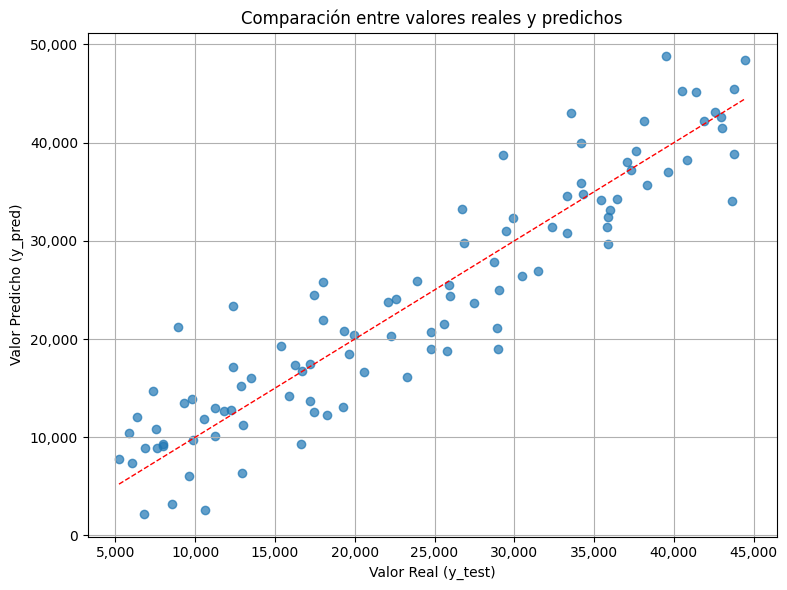

In [ ]:
import matplotlib.ticker as ticker

# Crear grafica de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test_sim, y_pred_sim, alpha=0.7)
plt.plot([y_test_sim.min(), y_test_sim.max()], [y_test_sim.min(), y_test_sim.max()], 'r--', lw=1)
plt.xlabel('Valor Real (y_test)')
plt.ylabel('Valor Predicho (y_pred)')
plt.title('Comparación entre valores reales y predichos')
plt.grid(True)

# Formato de los ejes
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

